In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
dataset=pd.read_csv('/content/Crop_recommendation.csv')

#importing the data
print(dataset)

        N   P   K  temperature   humidity        ph    rainfall   label  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice   
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice   
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice   
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice   
...   ...  ..  ..          ...        ...       ...         ...     ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

      Year before price(/quintal)  Current price(/quintal)  \
0                            2944    

In [42]:
#printing the top few rows of the dataset
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Year before price(/quintal),Current price(/quintal),Percentage increase in price,recomandation
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,2944,2913,-1.052989,No
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,2959,3004,1.520784,No
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,3140,3082,-1.847134,No
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,2992,3053,2.038770,No
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,3082,2990,-2.985075,No


In [43]:
#statistics about the dataset
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall,Year before price(/quintal),Current price(/quintal),Percentage increase in price
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,5173.114091,6004.729545,17.074558
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,4840.237646,5967.701216,37.752910
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,701.000000,800.000000,-70.883310
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,1933.500000,1981.750000,-4.154501
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,3689.500000,3971.500000,8.324725
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,6392.750000,7607.500000,30.427640
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,27957.000000,34927.000000,422.077728


In [44]:
#removing duplicates
dataset=dataset.drop_duplicates()
print(dataset)

        N   P   K  temperature   humidity        ph    rainfall   label  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice   
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice   
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice   
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice   
...   ...  ..  ..          ...        ...       ...         ...     ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

      Year before price(/quintal)  Current price(/quintal)  \
0                            2944    

In [45]:
#statistics of data after removal of duplicates
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall,Year before price(/quintal),Current price(/quintal),Percentage increase in price
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,5173.114091,6004.729545,17.074558
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,4840.237646,5967.701216,37.752910
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,701.000000,800.000000,-70.883310
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,1933.500000,1981.750000,-4.154501
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,3689.500000,3971.500000,8.324725
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,6392.750000,7607.500000,30.427640
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,27957.000000,34927.000000,422.077728


In [46]:
#finding blank values
dataset.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label,Year before price(/quintal),Current price(/quintal),Percentage increase in price,recomandation
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
#checking null values catagory wise
dataset.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0
Year before price(/quintal),0
Current price(/quintal),0


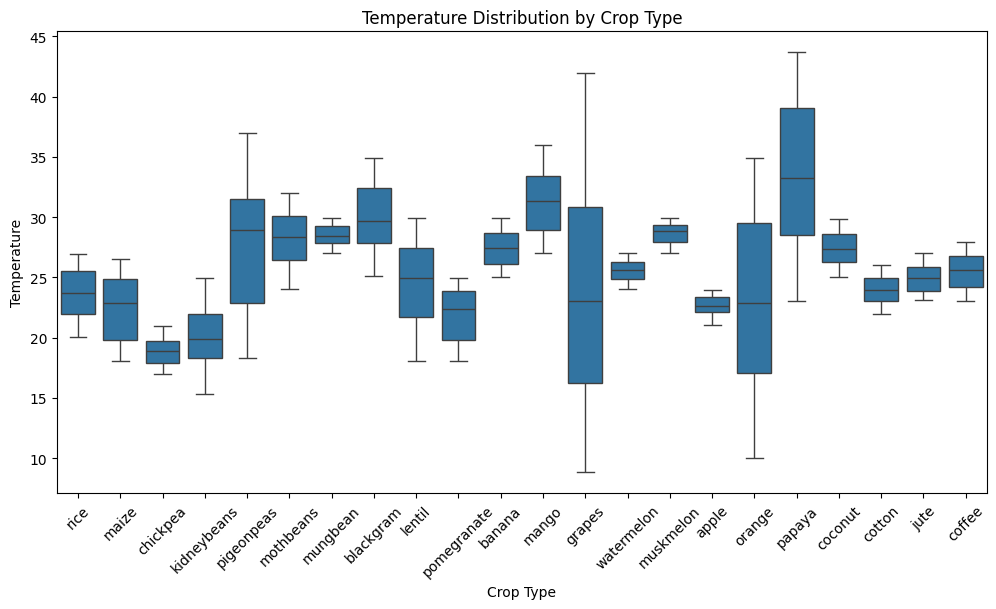

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='temperature', data=dataset)
plt.title('Temperature Distribution by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.show()


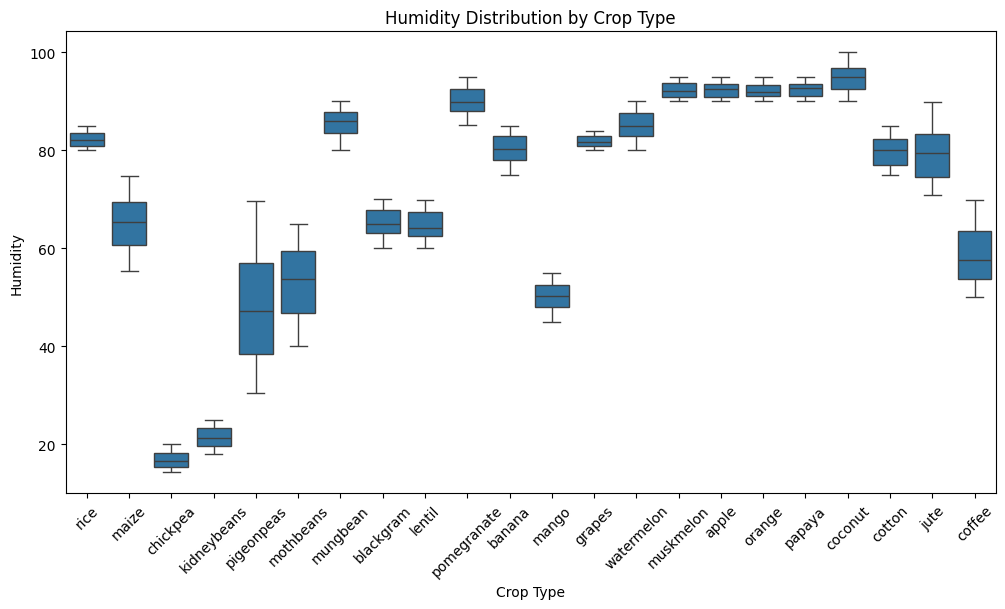

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='humidity', data=dataset)
plt.title('Humidity Distribution by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Humidity')
plt.xticks(rotation=45)
plt.show()


In [50]:
#spliting data into independent and dependent variables
#independent variables
x=dataset.iloc[:,[0,1,2,3,4,5,6,8,9]].values

#dependent variable
y= dataset.iloc[:, 11].values

In [51]:
#printing independent variable values
print(x)
print()

#printing dependent variable values
print(y)

[[  90.          42.          43.        ...  202.9355362 2944.
  2913.       ]
 [  85.          58.          41.        ...  226.6555374 2959.
  3004.       ]
 [  60.          55.          44.        ...  263.9642476 3140.
  3082.       ]
 ...
 [ 118.          33.          30.        ...  173.3228386 2788.
  3415.       ]
 [ 117.          32.          34.        ...  127.1752928 4417.
  4820.       ]
 [ 104.          18.          30.        ...  140.9370415 4882.
  3053.       ]]

['No' 'No' 'No' ... 'coffee' 'coffee' 'No']


In [52]:
#splitting the dataset into trainning and test set
from sklearn.model_selection import train_test_split

#dataset is splites in 3:1 proporsion as train:test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [53]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [54]:
#Random Forest algorithm

#fitting random forest classifier to the training set
from sklearn.ensemble import RandomForestClassifier

#we generate 10 random trees to predict the output
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

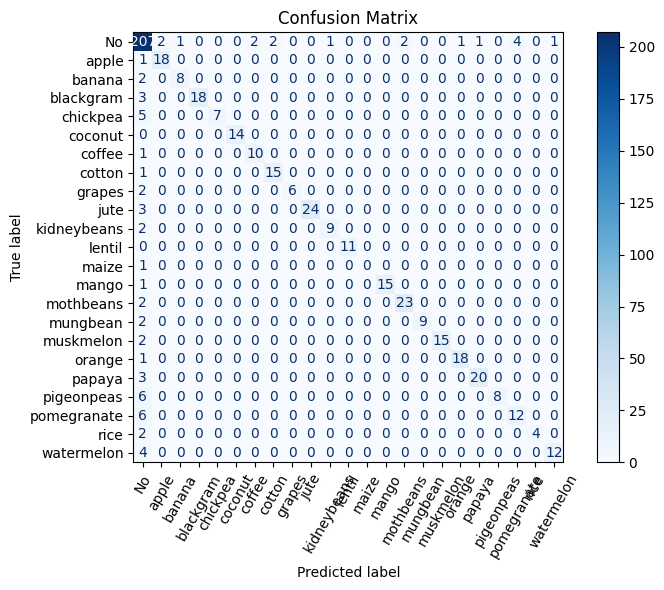

In [55]:
#Random Forest algorithm

#predicting the test set results
y_pred=classifier.predict(x_test)

# Importing necessary modules
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

# Adjusting the figure size
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)

# Rotating x-axis labels for better readability
plt.xticks(rotation=60)
plt.title('Confusion Matrix')
plt.tight_layout()  # Adjusting layout to avoid overlapping
plt.show()

In [56]:
#Decision Tree algorithm

#fitting decision tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

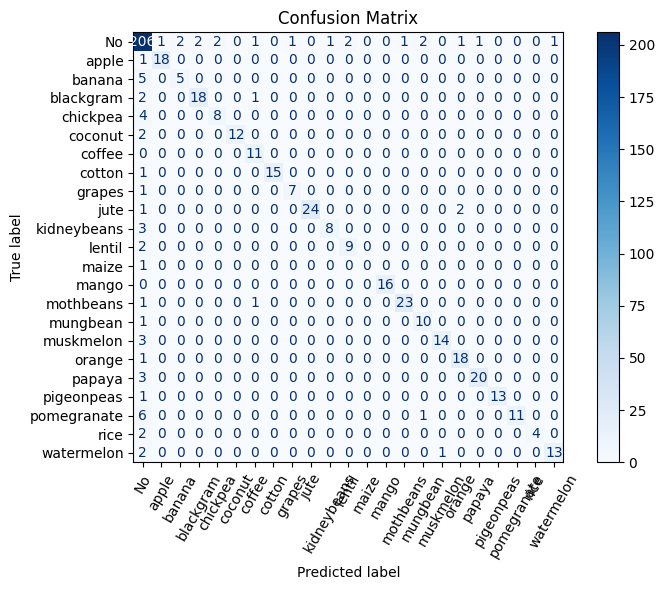

In [57]:
#Decision Tree algorithm

#predicting the test set results
y_pred=classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

# Adjusting the figure size
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)

# Rotated x-axis labels for better readability
plt.xticks(rotation=60)
plt.title('Confusion Matrix')
plt.tight_layout()  # Adjusted layout to avoid overlapping
plt.show()

In [58]:
#Naive Bayes Algorithm

#fitting naive bayes algorithm to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

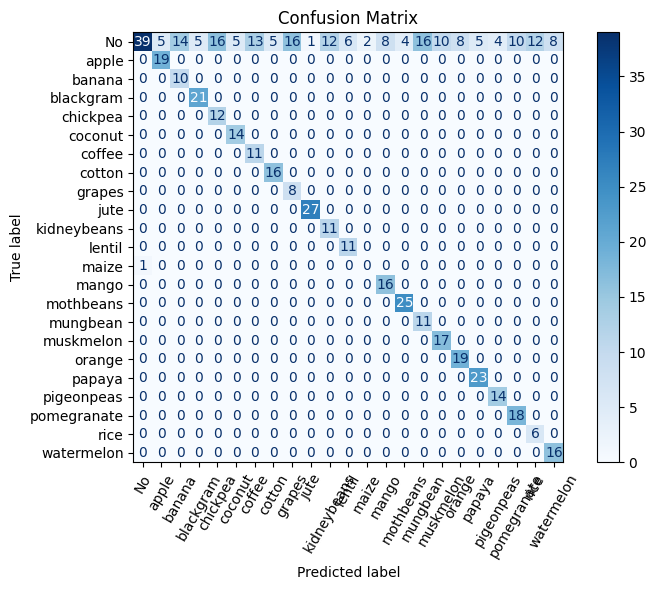

In [59]:
#Naive Bayes algorithm

#predicting the test set results
y_pred=classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

# Adjusting the figure size
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)

# Rotated x-axis labels for better readability
plt.xticks(rotation=60)
plt.title('Confusion Matrix')
plt.tight_layout()  # Adjusting layout to avoid overlapping
plt.show()



In [60]:
# Support Vector Machine classifier

# Support vector classifier
from sklearn.svm import SVC

#fitting support vector classifier to the training set
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

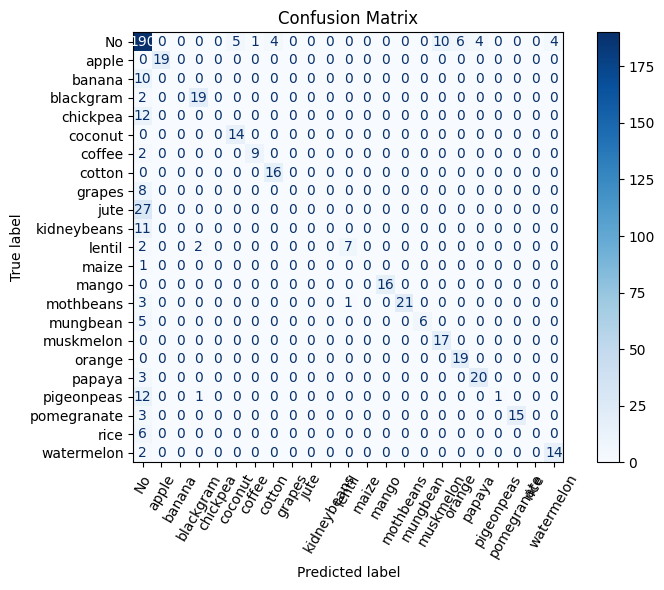

In [61]:
#Support Vector Machine algorithm

#predicting the test set results
y_pred=classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

# Adjusted the figure size
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)

# Rotated x-axis labels for better readability
plt.xticks(rotation=60)
plt.title('Confusion Matrix')
plt.tight_layout()  # Adjusting layout to avoid overlapping
plt.show()